In [1]:
import logging
logging.root.setLevel(logging.INFO)


In [2]:
import random

from xcs import XCSAlgorithm
from xcs.scenarios import Scenario

In [3]:
from utils.xcs_utils import *

In [4]:
exploration_cycles = 4000
exploitation_cycles = 1000
input_size = 8
logging.root.setLevel(logging.INFO)
scenario = MazeScenario(input_size)
scenario.maze.reset()
scenario.maze.render()


■ ■ ■ ■ ■ ■ ■ ■
■ □ □ ■ □ □ $ ■
■ ■ □ □ ■ □ □ ■
■ ■ □ ■ □ □ ■ ■
■ A □ □ □ □ □ ■
■ ■ □ ■ □ □ □ ■
■ □ □ □ □ ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■


In [5]:
import numpy as np
algorithm = XCSAlgorithm()
algorithm.max_population_size = 1600
algorithm.learning_rate = .1
algorithm.error_threshold = .01              # epsilon_0
algorithm.ga_threshold = 25
algorithm.crossover_probability = 1
algorithm.mutation_probability = 0.01
algorithm.initial_prediction = 0.000001               # p_I
algorithm.initial_error = 0.000001            # epsilon_I
algorithm.initial_fitness = 0.000001           # F_I
algorithm.wildcard_probability = 0.0

In [6]:
other_metrics = other_avg_experiment(
                                     maze=scenario,
                                     algorithm=algorithm,
                                     number_of_tests=2,
                                     explore_trials=exploration_cycles,
                                     exploit_trials=exploitation_cycles
                                    )


Executing 0 experiment
Executing 1 experiment


In [7]:
display(other_metrics)

,steps_in_trial,population,numerosity
trial,,,
0,50.0,48.5,49.0
100,6.0,361.0,1600.0
200,31.5,395.5,1600.0
300,43.0,428.5,1600.0
400,50.0,419.5,1600.0
500,26.5,457.5,1600.0
600,50.0,446.0,1600.0
700,50.0,452.5,1600.0
800,25.0,460.0,1600.0


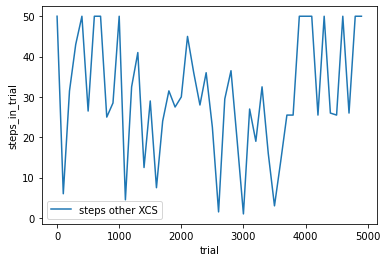

In [8]:
import pandas as pd

ax = other_metrics["steps_in_trial"].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps_in_trial")
ax.legend(["steps other XCS"])

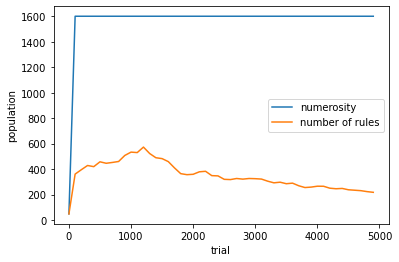

In [9]:
ax = other_metrics[['numerosity', 'population']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["numerosity", "number of rules"])

In [10]:
from lcs.agents.xcs import Configuration
from utils.xcs_utils import *
                    

cfg = Configuration(number_of_actions=8,
                    max_population=1600,
                    covering_wildcard_chance = 1,
                    ga_threshold = 25,
                    metrics_trial_frequency=100,
                    mutation_chance=0.03,
                    chi=1,                           # crossover
                    initial_prediction = 0.000001,               # p_I
                    initial_error = 0.000001,            # epsilon_I
                    initial_fitness = 0.000001,           # F_I
                    user_metrics_collector_fcn=xcs_metrics)

In [11]:
from lcs.agents.xcs import XCS


agent = XCS(cfg)
my_metrics = avg_experiment(scenario,
                    cfg,
                    number_of_tests=2,
                    explore_trials=exploration_cycles,
                    exploit_metrics=exploitation_cycles)


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 50, 'reward': [4.836287384277442e-09, 1.6684282005825426e-08, 6.437759836689109e-09, 1.392450632915218e-08, 2.1792379812948417e-08, 2.971721987786438e-08, 2.1624968920133062e-08, 1.26791328095606e-08], 'perf_time': 0.011392000000000735, 'population': 56, 'numerosity': 68}


Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 32, 'reward': [241.51443312385032, 44.623229242616254, 40.71775646365462, 37.72319091571088, 33.35598974526732, 38.82214537045884, 32.919664351020366, 38.04691221113493], 'perf_time': 0.057983100000001286, 'population': 341, 'numerosity': 1600}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 50, 'reward': [79.44122051975442, 122.41316129680347, 94.79532687264832, 36.077378949996515, 73.55017477508912, 70.0491621845374, 61.15068647640493, 50.994729394637375], 'perf_time': 0.08256489999996575, 'population': 400, 'numerosity': 1600}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_trial': 5, 'reward': [138.7518865622147, 35.13388777066633, 33.97854554032625, 55.09370962542083, 44.4538914084225, 45.88457460296555, 34.73001152758987, 39.93706504450335], 'perf_time': 0.01492340000004333, 'population': 374, 'numerosity': 1600}
INFO:lcs.agents.Agent:{'trial': 1600, 'steps_in_trial': 50, 'reward': [51.29378815702274, 58.95977072967117

Executing 1 experiment


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 50, 'reward': [48.82195785845994, 50.24232808697319, 23.711325863951615, 31.249834790032068, 31.908697546389938, 56.284077872272874, 25.72376711323518, 34.989172692283276], 'perf_time': 0.06830270000000382, 'population': 304, 'numerosity': 1600}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 24, 'reward': [203.02757523029393, 104.97104307722947, 120.48400508346147, 48.85053488071782, 48.90689745760848, 40.37512593603724, 64.22785375102386, 62.296820178969206], 'perf_time': 0.03964449999989483, 'population': 367, 'numerosity': 1600}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_trial': 50, 'reward': [67.8723765937962, 69.97776353649203, 78.03282479519208, 64.66725485750048, 60.051870203188756, 68.30748276535797, 69.40696946357976, 73.33986822137385], 'perf_time': 0.07762079999997695, 'population': 380, 'numerosity': 1600}
INFO:lcs.agents.Agent:{'trial': 1600, 'steps_in_trial': 50, 'reward': [25.81853030495551, 59.866073992

In [12]:
display(my_metrics)

,steps_in_trial,perf_time,population,numerosity
trial,,,,
0,50.0,0.012739,68.0,75.0
100,23.5,0.037509,266.5,1600.0
200,50.0,0.078363,299.0,1600.0
300,50.0,0.078398,323.0,1600.0
400,41.0,0.063143,322.5,1600.0
500,42.0,0.079188,350.0,1600.0
600,50.0,0.096511,335.5,1600.0
700,50.0,0.098792,360.0,1600.0
800,37.0,0.061105,383.5,1600.0


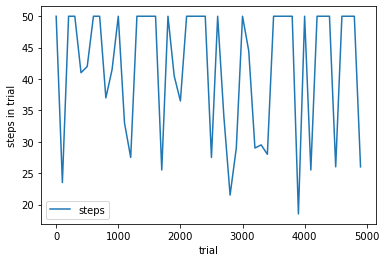

In [13]:
import pandas as pd

ax = my_metrics['steps_in_trial'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps in trial")
ax.legend(["steps"])


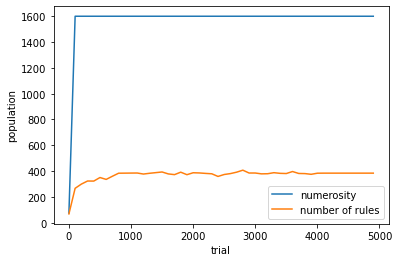

In [14]:
ax = my_metrics[['numerosity', 'population']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["numerosity", "number of rules"])

#### Conclusions
None so far.